<a href="https://colab.research.google.com/github/abh22/LSTM-Stock-Prediction/blob/main/LSTM_Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [2]:
apple_train=pd.read_csv('/content/drive/MyDrive/Stock_lstm/AAPL.csv')

In [3]:
apple_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670975,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663898,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852779,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317905,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164429,82271200


In [4]:
apple_train_processed=apple_train.iloc[:, 1:2].values

In [5]:
apple_train_processed


array([[ 42.540001],
       [ 43.1325  ],
       [ 43.134998],
       ...,
       [129.669998],
       [127.989998],
       [128.410004]])

In [6]:
# @title Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
apple_train_scaled=scaler.fit_transform(apple_train_processed)

In [8]:
# @title Shaping training data
features_set=[]
labels=[]
# past 60 days for each feature set
for i in range(60,1160):
  features_set.append(apple_train_scaled[i-60: i , 0])
  labels.append(apple_train_scaled[i,0])
features_set, labels = np.array(features_set), np.array(labels)
features_set= np.reshape(features_set,(features_set.shape[0],features_set.shape[1],1))



In [9]:
# @title Building architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model =Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(features_set,labels,epochs=100,batch_size=32)




Epoch 1/100
35/35 [==============================] - 13s 103ms/step - loss: 0.0354
Epoch 2/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0058
Epoch 3/100
35/35 [==============================] - 5s 147ms/step - loss: 0.0046
Epoch 4/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0049
Epoch 5/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0048
Epoch 6/100
35/35 [==============================] - 4s 123ms/step - loss: 0.0045
Epoch 7/100
35/35 [==============================] - 5s 130ms/step - loss: 0.0038
Epoch 8/100
35/35 [==============================] - 4s 100ms/step - loss: 0.0040
Epoch 9/100
35/35 [==============================] - 4s 101ms/step - loss: 0.0043
Epoch 10/100
35/35 [==============================] - 5s 147ms/step - loss: 0.0038
Epoch 11/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0039
Epoch 12/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0038
Epoch 13/100

In [10]:
apple_test=pd.read_csv('/content/drive/MyDrive/Stock_lstm/AAPL_test.csv')
apple_test_processed=apple_test.iloc[:,1:2].values

In [11]:
apple_test_processed

array([[130.279999],
       [126.889999],
       [127.129997],
       [126.010002],
       [130.470001],
       [130.259995],
       [131.25    ],
       [133.880005],
       [132.029999],
       [134.830002],
       [136.820007],
       [134.080002],
       [135.279999],
       [138.119995],
       [140.309998],
       [140.889999],
       [143.169998],
       [143.160004],
       [144.960007]])

In [16]:
apple_total=pd.concat((apple_train['Open'],apple_test['Open']),axis=0)
test_inputs=apple_total[len(apple_total)-len(apple_test)-60:].values


In [17]:
test_inputs=test_inputs.reshape(-1,1)
test_inputs=scaler.transform(test_inputs)

# @title Shaping testing data
test_features=[]
for i in range(60,80):
  test_features.append(test_inputs[i-60: i , 0])

test_features = np.array(test_features)
test_features= np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))




1/1 [==============================] - 0s 192ms/step


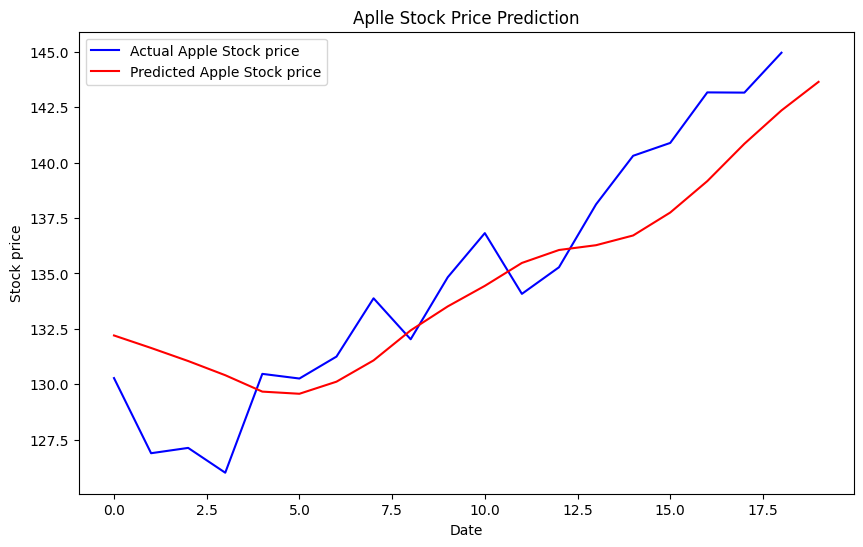

In [19]:
import matplotlib.pyplot as plt
pred=model.predict(test_features)
pred=scaler.inverse_transform(pred)
plt.figure(figsize=(10,6))
plt.plot(apple_test_processed, color='blue',label='Actual Apple Stock price')
plt.plot(pred, color='red',label='Predicted Apple Stock price')
plt.title('Aplle Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.legend()
plt.show()
